 # Predicting the road accidents #

In [1]:
# Lets first load required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Introduction/Business Problem

While travelling from one city to another city by road, sometimes people face terrible traffic jam on road due to accident happens due to bad weather condition or bad road condition. People get stuck longer hours in trafficjam and due to that people face below problems:
1. Can't reach at destination place on right time, due to that they may miss some task to finish. e.g.: fail to attend interview on time, miss the doctor consultation, miss the business meetings, etc. 
2. Lots of fuel gets waste due to slow vehicle movement.
3. People gets irritate while waiting in long queue, due to that they get tired physical and mentally.
4. Sometimes, people may feel physical problems (due to hunger, stopping urination, etc).
5. Patients may face severe health problem, if gets stuck for longer hours.

So, considering above points, can we predict the accident on road before start travelling, based on bad weather (windy, rainy, etc) or bad road condition. 
Can we build the machine learning model which can warn possibility of accident before travelling, so people can drive more carefully or change the travel plan or change the travel route?
Let's check dataset available and predict the forecast for possibility of car accident based on bad weather or bad road condition, based on machine learning model.

This model can be useful for the people who travels from one city to another city, in bad weather condition or in bad road condition.

# Data Section

### Load Data From CSV File

Lets download the dataset from url.

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-07 16:46:04--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  35.4MB/s   in 2.0s   

2020-09-07 16:46:06 (35.4 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### About dataset

Check the details of each columns of this dataset at this link:
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

### Data Understanding

In [4]:
df.shape

(194673, 38)

Here total 37 attrebutes/features (independent variable) are available. Severitycode is the target lable (indipendent variable). Lets check all the attributes and find out which are the attributes are really helpful to create the model. There are number of samples(rows) available for each column, we need to check, whether all the feature is having proper numeric/catagorical value available or not, else need to remove or replace the Nan or any missing values. 

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Here serverity code is the target label and is having only two types of severity codes available in dataset.

 ### Data visualization and pre-processing

To choose the proper features/attributes, Let's check the correlation between each attributes and select the feature accordingly.
Lets plot the heatmap to see the correlation between the numeric features

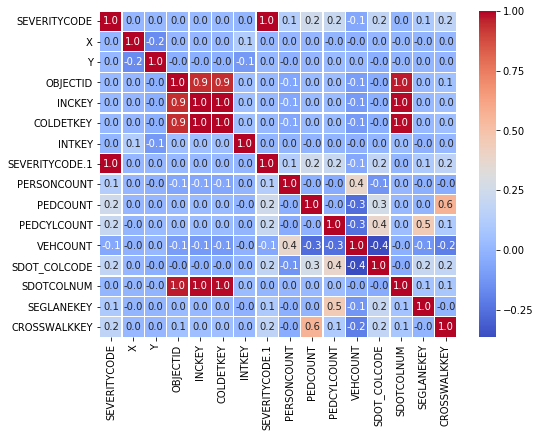

In [7]:
#correlation map
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, linewidths=.3,fmt= '.1f',ax=ax,cmap= 'coolwarm')

Based on heatmap, we can conclude below points:
1. SEVERITYCODE and SEVERITYCODE.1 both are same. 
2. No relationship between SEVERITYCODE and X, Y, OBJECTID, INCKEY, COLDETKEY, INTKEY, SDOTCOLNUM. So, better to exclude these attributes and create new dataframe.
3. There is very very less relationship between SEVERITYCODE and PERSONCOUNT, SEGLANEKEY. So, let's remove it as well.

Also, Based on the feature details mentioned in above given link, it seems that there are lots of catogorial features/attributes are of no relation with weather condition and road condition and severity code. And those features will not play good role in our model to predict the severity code.

In [8]:
columns_exclude = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'SDOTCOLNUM','VEHCOUNT','SEVERITYCODE.1','PERSONCOUNT','SEGLANEKEY']
df1 = df.drop(columns_exclude, axis=1)
df1.shape

(194673, 27)

Let's create the heat map again to check the correlation of features.

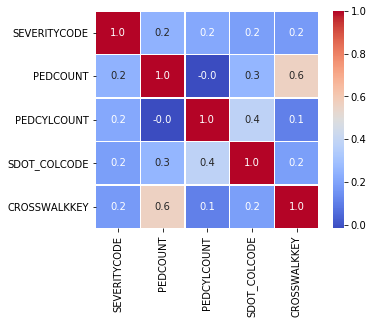

In [9]:
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(df1.corr(), annot=True, linewidths=0.5,fmt= '.1f',ax=ax,cmap= 'coolwarm')

heatmap shows correlation between features which are having numeric values. Let's check all the remaining categorical features as well.

In [10]:
df1.columns

Index(['SEVERITYCODE', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PEDCOUNT', 'PEDCYLCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [11]:
df1.shape

(194673, 27)

### Pre-processing:  Feature selection/extraction

By checking the details of each features one by one, it seems that below features are not having any relations with accident happened on road due to weather condition or bad road condition. So, better remove it from dataframe.

In [12]:
exclude_feature = ['REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION','EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE','PEDCOUNT', 'PEDCYLCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',\
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','ST_COLDESC', 'CROSSWALKKEY', 'HITPARKEDCAR','ST_COLCODE', 'SPEEDING', 'LIGHTCOND']
len(exclude_feature)

24

In [13]:
df2 = df1.drop(exclude_feature, axis=1)
df2.shape

(194673, 3)

Most important features of this dataset to build model are \:
1. Weather
2. Road Condition

Let's consider only this two features along with target feature.

In [14]:
df2.columns

Index(['SEVERITYCODE', 'WEATHER', 'ROADCOND'], dtype='object')

In [15]:
df2.head()

,SEVERITYCODE,WEATHER,ROADCOND
0,2,Overcast,Wet
1,1,Raining,Wet
2,1,Overcast,Dry
3,1,Clear,Dry
4,2,Raining,Wet


In [16]:
df2.shape

(194673, 3)

Let's remove all the samples which are having Nan values.

In [17]:
df2.dropna(subset = ['WEATHER', 'ROADCOND'], inplace=True)
df2.shape

(189543, 3)

Let's check individual features and remove unwanted samples.

In [18]:
df2['WEATHER'].value_counts()

Clear                       111116
Raining                      33141
Overcast                     27702
Unknown                      15080
Snowing                        907
Other                          830
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Our aim is to create the model which can predict the road accident due to bad weather. So, it would be good to remove the sample, which indicates weather is 'clear' and 'unknown'.

In [45]:
Clear_Weather = df2[df2['WEATHER'] == 'Clear'].index
df2.drop(Clear_Weather, inplace=True)
Unknown_Weather = df2[df2['WEATHER'] == 'Unknown'].index
df2.drop(Unknown_Weather, inplace=True)
Other_Weather = df2[df2['WEATHER'] == 'Other'].index
df2.drop(Other_Weather, inplace=True)

In [20]:
df2['WEATHER'].value_counts()

Raining                     33141
Overcast                    27702
Snowing                       907
Fog/Smog/Smoke                569
Sleet/Hail/Freezing Rain      113
Blowing Sand/Dirt              55
Severe Crosswind               25
Partly Cloudy                   5
Name: WEATHER, dtype: int64

Let's check the road condition feature and remove unwanted samples from it.

In [21]:
df2['ROADCOND'].value_counts() 

Wet               43357
Dry               17256
Snow/Slush          807
Ice                 471
Unknown             409
Standing Water      101
Other                43
Oil                  41
Sand/Mud/Dirt        32
Name: ROADCOND, dtype: int64

Here unknown roadcondition will not add any value, so better to remove such samples.

In [22]:
Unknown_roadcond = df2[df2['ROADCOND'] == 'Unknown'].index
df2.drop(Unknown_roadcond, inplace=True)
Other_roadcond = df2[df2['ROADCOND'] == 'Other'].index
df2.drop(Other_roadcond, inplace=True)
df2['ROADCOND'].value_counts() 

Wet               43357
Dry               17256
Snow/Slush          807
Ice                 471
Standing Water      101
Oil                  41
Sand/Mud/Dirt        32
Name: ROADCOND, dtype: int64

In [23]:
print(df2.shape)
df2.head()

(62065, 3)


,SEVERITYCODE,WEATHER,ROADCOND
0,2,Overcast,Wet
1,1,Raining,Wet
2,1,Overcast,Dry
4,2,Raining,Wet
6,1,Raining,Wet


After removing unwanted samples, its time to reset the index.

In [24]:
df2.reset_index(drop=True, inplace=True)
df2.head()

,SEVERITYCODE,WEATHER,ROADCOND
0,2,Overcast,Wet
1,1,Raining,Wet
2,1,Overcast,Dry
3,2,Raining,Wet
4,1,Raining,Wet


### Convert Categorical features to numerical values

Here, Weather and Road condition features are having categorial data. So, let's convert it into numerical values by using one-hot encoding method.

In [25]:
Feature = df2[['WEATHER', 'ROADCOND']]
Feature = pd.get_dummies(Feature, columns=['WEATHER', 'ROADCOND'])
Feature.head()

,WEATHER_Blowing Sand/Dirt,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [26]:
X = Feature
X.head()

,WEATHER_Blowing Sand/Dirt,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [27]:
y = df2['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 2, 1])

# Modeling / Methodology and Analysis

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [29]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (49652, 15) (49652,)
Test set: (12413, 15) (12413,)


# Classification 

Let's try to use the training set to build an accurate model. 
We will try using following algorithm and will check the accuracy to select best algorithm suitable for our mode.
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

### K Nearest Neighbor(KNN)

In [30]:
# Best k
K=10
std_accuracy=np.zeros((K-1))
mean_accuracy=np.zeros((K-1))
ConfustionMx=[];
for n in range(1,K):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
        
    mean_accuracy[n-1]=np.mean(yhat==y_test);
    
    std_accuracy[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_accuracy

array([0.49899299, 0.6767099 , 0.50487392, 0.67662934, 0.67534037,
       0.67679046, 0.67638766, 0.67638766, 0.67638766])

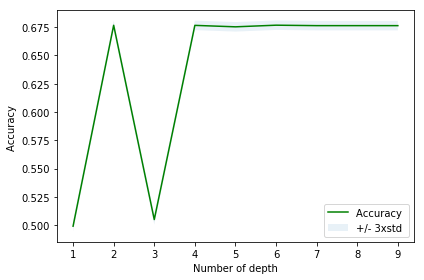

In [31]:
plt.plot(range(1,K),mean_accuracy,'g')
plt.fill_between(range(1,K),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of depth')
plt.tight_layout()
plt.show()

In [32]:
print("Max value of mean accuracy = ", mean_accuracy.max())
print("Best K value is = ", np.argmax(mean_accuracy)+1)

Max value of mean accuracy =  0.6767904616128253
Best K value is =  6


In [33]:
kNN_model = KNeighborsClassifier(n_neighbors=6).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [34]:
knn_yhat = kNN_model.predict(X_test)
jac_KNN = jaccard_similarity_score(y_test, knn_yhat)
f1_KNN = f1_score(y_test, knn_yhat, average='weighted')
print("KNN_Jaccard score: %.2f" % jac_KNN)
print("KNN_Avg F1-score: %.2f" % f1_KNN)

KNN_Jaccard score: 0.68
KNN_Avg F1-score: 0.55


## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
DecisionTree_yhat = DT_model.predict(X_test)
jac_DT = jaccard_similarity_score(y_test, DecisionTree_yhat)
f1_DT = f1_score(y_test, DecisionTree_yhat, average='weighted')
print("DecisionTree_Jaccard score: %.2f" % jac_DT)
print("DecisionTree_Avg F1-score: %.2f" % f1_DT)

DecisionTree_Jaccard score: 0.68
DecisionTree_Avg F1-score: 0.55


## Support Vector Machine

In [37]:
from sklearn import svm
SVM_model = svm.SVC(gamma='scale')
SVM_model.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
svm_yhat = SVM_model.predict(X_test)
jac_SVM = jaccard_similarity_score(y_test, svm_yhat)
f1_SVM = f1_score(y_test, svm_yhat, average='weighted',labels=np.unique(svm_yhat))
print("SVM_Jaccard score: %.2f" % jac_SVM)
print("SVM_Avg F1-score: %.2f" % f1_SVM)

SVM_Jaccard score: 0.68
SVM_Avg F1-score: 0.81


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.68      1.00      0.81      8401
           2       0.00      0.00      0.00      4012

   micro avg       0.68      0.68      0.68     12413
   macro avg       0.34      0.50      0.40     12413
weighted avg       0.46      0.68      0.55     12413

Confusion matrix, without normalization
[[8401    0]
 [4012    0]]


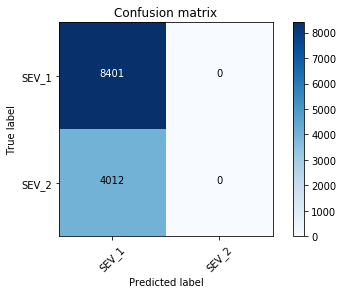

In [40]:
import warnings
warnings.filterwarnings('ignore')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEV_1','SEV_2'],normalize= False,  title='Confusion matrix')

## Logistic Regression


In [41]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01,solver='lbfgs').fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
jac_LR = jaccard_similarity_score(y_test, LR_yhat)
f1_LR = f1_score(y_test, LR_yhat, average='weighted',labels=np.unique(LR_yhat))
ll_LR = log_loss(y_test, LR_yhat_prob)
print("LR_Jaccard score: %.2f" % jac_LR)
print("LR_Avg F1-score: %.2f" % f1_LR)
print("LR_Log_loss: %.2f" % ll_LR)

LR_Jaccard score: 0.68
LR_Avg F1-score: 0.81
LR_Log_loss: 0.63


Confusion matrix, without normalization
[[8401    0]
 [4012    0]]


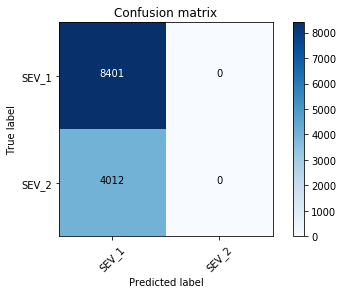

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LR_yhat, labels=[1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEV_1','SEV_2'],normalize= False,  title='Confusion matrix')

Based on confusion matrix, it's been observed that TP(True Positive) values is 8401 and FN(False Nagative) values are 4012. It means actual that severity_1 code is predicated 100% correctly. But, for severity code 2, model is predicting all values are as severity code 1.

# Results and Discussion

In [44]:
Report = {'Algorithm': ['KNN','Desicion Tree','SVM','LogisticRegression'],
        'Jaccard': [jac_KNN,jac_DT,jac_SVM,jac_LR],
        'F1-score': [f1_KNN,f1_DT,f1_SVM,f1_LR],
        'LogLoss': ["NA",'NA','NA',ll_LR],
        }

df_report = pd.DataFrame(Report, columns = ['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'])
df_report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.67679,0.546484,NA
1,Desicion Tree,0.67679,0.546484,NA
2,SVM,0.67679,0.807245,NA
3,LogisticRegression,0.67679,0.807245,0.627976


F1 score of SVM and Logistic regression is more then KNN and Descion Tree algorithm. And, Jaccard score is similer for all the algorithms. It would be good to choose the SVM or Logistic Regression model for better prediction of target value.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. It's value is 0.63 in Logistic Regression model.

# Conclusion

Purpose of this project was to predict the accident and traffic jam because of bad weather or bad road condition. To create this model, generic approach is applied where prediction of accident is found based on current weather condition and bad road condition features. There are other 35 features were available in dataset, but those are not relevant to predict accident on road and not having direct relationship with severity code. So, after checking the correlation between severity code and other features, it observed that there was some relation among independent features, but not having direct relation with target label. So, by going deep and understanding each feature and based on correlation & heatmap method, excluded number of features from creating final model.

As, target values are not continuous, used classification algorithm to predict the accident. First divided dataset into 80-20 ratio. then, used four classification algorithms and trained models one by one using training dataset comprises of 80% of total final dataset. and evaluate it on remaining 20% testing dataset.

Based on the result it seems that SVM and logistic regression algorithms gives better accuracy compared to KNN and Decision tree algorithms. As this model is generic, location is not included to predict the bad weather and road condition between particular two locations/cities. For future, we can get the weather and road condition details between source and destination places/cities and considerting that location information to predict the severity and probability of traffic jam on road to give more accurate result.
